# **Semesterabschließende schriftliche Ausarbeitung**  
**Fachhochschule Südwestfalen**

---

**Modul:** Deep Learning  
**Semester:** Wintersemester 2025/2026  
**Thema:** *Deep-Learning-basierte Inspektion von Tethered Caps*

---

### **Autoren**
**Sarah Gemünden** — Matrikelnummer: 30482243  
**Chanyut Bonkhamsaen** — Matrikelnummer: 30401284

**Diese Arbeit wurde von beiden Autoren zu gleichen Teilen (50 % / 50 %) erarbeitet.**

---

**Abgabe am:** XX. Februar 2026  

---

# Gliederung

**1. Einleitung**  
**2. Theoretische Grundlagen**  
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Sicherungsringinspektion in Getränkeabfüllanlagen  
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Anforderungen und Herausforderungen der Tetherd-Caps-Inspektion    
&nbsp;&nbsp;&nbsp;&nbsp;2.3 Bewertungsmetriken im Kontext der Tethered-Caps-Inspektion  
&nbsp;&nbsp;&nbsp;&nbsp;2.4 ?  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1 ?


**3. Datenimport und Datenvorbereitung**  
&nbsp;&nbsp;&nbsp;&nbsp;3.1 technisches Setup und Paketimporte  
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Datenimport und erste explorative Datenanalyse  
&nbsp;&nbsp;&nbsp;&nbsp;3.3 Datensplits   
&nbsp;&nbsp;&nbsp;&nbsp;3.4 Bildvorverarbeitung   
&nbsp;&nbsp;&nbsp;&nbsp;3.5 Datasets und DataLoader   


**4. Überwachte Bildklassifikation zur Inspektion von Tethered Caps**  
**5. Unüberwachter Ansatz mittels Encoder-Netzwerken**  
**6. Zusammenfassung und Ausblick**  
**7. Quellenverzeichnis**  
**8. Eigenständigkeitserklärung**  

# 1. Einleitung

* Hintergrund: Abfüllanlagen in der Getränkeindustrie
* div. Inspektionstechnik in einer Abfüllanlage
* Qualitätskontrolle im Verschließprozess
* Sicherungsringinspektion
* Herausforderung durch Tethtered Caps
* Motivation für den Einsatz von Deep Learning
* Zielsetzung der Arbeit

Ziel:
•	Accuracy: 97,0 %
•	Fehlerkennungsrate: < 0,1 % (False-Positive-Rate)


# 2. Theoretische Grundlagen

## 2.1 Sicherungsringinspektion in Getränkeabfüllanlagen

In Getränkeabfüllanlagen ist eine sichere und dichte Verschließung der Behälter entscheidend für Produktqualität, Haltbarkeit und Geschmack. Ein beschädigter oder unvollständiger Sicherungsring kann zu Undichtigkeiten führen und damit die Produktsicherheit beeinträchtigen. Die folgende schematische Darstellung zeigt den Bereich des Sicherungsrings in Rot:

<p align="center">
  <img src="Bilder/Sicherungsring.png" width="150">
</p>

Zur automatisierten Überprüfung des Sicherungsrings wird bei der KHS GmbH das System Innocheck TSI (Tamper-evident Seal Inspection) eingesetzt. Das System inspiziert den Sicherungsring eines Verschlusses auf Unversehrtheit, indem es den gesamten Ring aus unterschiedlichen Blickwinkeln erfasst und auswertet. Die folgende Abbildung verdeutlicht das Prinzip der optischen Erfassung und der 360-Grad-Rundumsicht:

<p align="center">
  <img src="Bilder/TSI.png" width="400">
</p>

Zwei Kameras erzeugen mithilfe einer Spiegeloptik eine 360°-Rundumsicht, während LED-Beleuchtung für gleichmäßige und reproduzierbare Lichtverhältnisse sorgt. Auf Basis moderner Bildverarbeitungsalgorithmen wertet die Software die Farbpixel und Strukturen des Sicherungsrings aus und erkennt dabei auch kleinste Beschädigungen. Da die Deckelgeometrie aus allen Richtungen gleich aussieht, ist eine zuverlässige Bewertung allein anhand der Farbpixel möglich.

Durch dieses Verfahren ermöglicht das System:
- eine zuverlässige Kontrolle der Ringintegrität
- die Erkennung kleinster Defekte
- eine vollständige Rundumsicht des Verschlusses [1]

Seit Juli 2024 gilt in der EU die Vorgabe, dass Einweg-Getränkeverpackungen bis zu drei Litern mit sogenannten Tethered Caps ausgestattet sein müssen. Dabei handelt es sich um Verschlusskappen, die auch nach dem Öffnen dauerhaft mit der Flasche verbunden bleiben, um zu verhindern, dass lose Deckel in die Umwelt gelangen. [2]

Durch die Einführung der Tethered Caps erhöhte sich die Vielfalt an Verschlussvarianten deutlich. Die neue, bewegliche Geometrie der Verschlüsse führt dazu, dass diese nicht mehr aus allen Richtungen gleich aussehen. Daher ist eine reine Inspektion anhand der Farbpixel, wie sie bei klassischen symmetrischen Schraubverschlüssen eingesetzt wurde, für diesen Anwendungsfall nicht mehr ausreichend.

Um weiterhin eine zuverlässige Qualitätskontrolle sicherzustellen, hat die KHS GmbH die bestehende Verschlusskontrolle Innocheck TSI um KI-basierte Verfahren erweitert. Kameras erfassen die Verschlüsse in hoher Auflösung, während die Modelle die aufgenommenen Bilder in Echtzeit auswerten. Durch den Einsatz von Deep Learning können sich die Systeme an neue Fehlerbilder anpassen und auch komplexe oder seltene Defekte zuverlässig erkennen. [3]

## 2.2 Anforderungen und Herausforderungen der Tethterd-Caps-Inspektion

Die Inspektion von Tethered Caps stellt hohe Anforderungen an die eingesetzten Bildverarbeitungs- und Klassifikationssysteme. Ziel ist die zuverlässige Beurteilung des Sicherungsrings eines Flaschenverschlusses im laufenden Produktionsprozess. Dabei handelt es sich um eine binäre Klassifikationsaufgabe, bei der Flaschen in die Klassen *gut* und *schlecht* eingeteilt werden. Als *schlecht* erkannte Flaschen werden unmittelbar nach der Erkennung aus dem Produktionsprozess ausgeschleust. Eine zentrale Anforderung besteht darin, dass eindeutig erkennbar ist, dass die Flasche noch nicht geöffnet wurde, was einen vollständig intakten Sicherungsring voraussetzt. Die Auswertung der Bilddaten muss in Echtzeit erfolgen, da als *schlecht* klassifizierte Flaschen direkt im Anschluss an die Inspektion aus dem Produktionsprozess ausgeschleust werden. Das Innocheck-TSI-System kann aktuell eine Leistung von bis zu 72 000 Flaschen pro Stunde verarbeiten, was 20 Flaschen pro Sekunde entspricht. Da pro Flasche vier Bildaufnahmen erstellt werden, müssen innerhalb einer Sekunde insgesamt 80 Bilder analysiert und klassifiziert werden. Dies entspricht einer erforderlichen Leistung von 80 Inferenzen pro Sekunde. Diese Echtzeitanforderung stellt eine wesentliche Randbedingung für den Entwurf und die Auswahl geeigneter Deep-Learning-Modelle dar. Neben der zeitlichen Anforderung gelten hohe Qualitätsanforderungen an die Klassifikation. Für den industriellen Einsatz werden unter anderem eine Accuracy von mindestens 97 % sowie eine Fehlerkennungsrate unter 0,1 % gefordert. Letztere bezieht sich auf fälschlich als schlecht klassifizierte gut-Flaschen (False-Positive-Rate), da diese unmittelbar wirtschaftliche Verluste verursachen. Die zugrunde liegenden Metriken sowie die Konfusionsmatrix werden in Kapitel 2.3 detailliert erläutert. In der Praxis ist die Inspektion von Tethered Caps mit einer Reihe von Herausforderungen verbunden. Flaschen können auf dem Transportband leicht wackeln, zudem dürfen Tropfen oder Kondensat auf der Oberfläche die Klassifikationsentscheidung nicht beeinflussen. Weitere erschwerende Faktoren sind variable Beleuchtungsverhältnisse, eine hohe Vielfalt an Deckelvarianten und Farben sowie die komplexe Geometrie der Tethered Caps. Letztere führt dazu, dass rein pixelbasierte Bildverarbeitungsverfahren, wie sie bei klassischen symmetrischen Schraubverschlüssen eingesetzt wurden, für diesen Anwendungsfall nur eingeschränkt geeignet sind.

Im Rahmen der Sicherungsringinspektion gibt es folgende typische Fehlerbilder:
- Risse  
- untergeschobene Sicherungsringe (auch als „Smile“ bezeichnet)  
- eine zu große Lücke zwischen Sicherungsring und Deckel  
- fehlende oder gebrochene Stege  
- Deformationen  

Die folgende Abbildung zeigt exemplarisch Beispiele dieser typischen Fehlerbilder.

<p align="center">
  <img src="Bilder/Fehlerbilder.jpg" width="800">
</p>

Die Ursachen für diese Defekte können vielfältig sein und liegen unter anderem darin, dass der Verschluss zu fest oder nicht weit genug aufgedreht wurde oder beim Aufdrehen hängen geblieben ist. Dadurch entsteht eine große Bandbreite visuell unterschiedlicher Fehlerbilder, was die zuverlässige automatisierte Erkennung zusätzlich erschwert.

## 2.3 Bewertungsmetriken im Kontext der Tethered-Cap-Inspektion

Zur Bewertung von Klassifikationsmodellen wird bei binären Klassifikationsaufgaben, wie der vorliegenden Sicherungsringinspektion, in der Regel die Konfusionsmatrix verwendet. Sie stellt die vorhergesagten Klassen den tatsächlichen Klassen gegenüber und ermöglicht eine differenzierte Analyse der Klassifikationsergebnisse anhand der vier Grundfälle True Positive, False Positive, True Negative und False Negative.

Die folgende Abbildung zeigt schematisch den Aufbau einer Konfusionsmatrix sowie die daraus ableitbaren Bewertungsmetriken.

<p align="center">
  <img src="Bilder/Konfusionsmatrix.png" width="800">
</p>

Im vorliegenden Anwendungsfall beziehen sich die Bezeichnungen *positiv* und *negativ* auf den Zustand des Flaschenverschlusses. Flaschen mit einem fehlerhaften oder beschädigten Verschluss werden dabei der *positiven* Klasse zugeordnet, während Flaschen mit einem intakten Verschluss der *negativen* Klasse entsprechen. Diese Zuordnung ist im industriellen Inspektionskontext üblich, da der Fokus der Klassifikation auf der Erkennung von Defekten liegt.

Auf Basis der Konfusionsmatrix lassen sich verschiedene Metriken berechnen. Für den vorliegenden industriellen Anwendungsfall sind insbesondere die folgenden beiden Kennzahlen von Bedeutung:

**Accuracy** beschreibt den Anteil aller korrekt klassifizierten Flaschen an der Gesamtzahl der geprüften Flaschen. Sie liefert einen allgemeinen Eindruck über die Leistungsfähigkeit des Modells, berücksichtigt jedoch nicht, welche Art von Fehlklassifikation vorliegt.  
Die **False-Positive-Rate** beschreibt den Anteil der gut-Flaschen, die fälschlich als schlecht klassifiziert und somit aus dem Produktionsprozess ausgeschleust werden. Diese Kenngröße ist im Inspektionskontext von besonderer Relevanz, da jede fälschlich ausgeschleuste einwandfreie Flasche unmittelbar wirtschaftliche Verluste verursacht.

Im Gegensatz zu Metriken wie Accuracy oder Recall kann die False-Positive-Rate nicht direkt aus der Konfusionsmatrix abgelesen werden. Sie ergibt sich vielmehr aus dem Verhältnis der False Positives zur Gesamtzahl der tatsächlich negativen Beispiele und kann als Gegenmaß zur Specificity berechnet werden. Die folgende Formel zeigt die Herleitung der False-Positive-Rate auf Basis der in der Konfusionsmatrix dargestellten Größen.

<p align="center">
  <img src="Bilder/FPR_Formel.png" width="400">
</p>

Durch die kombinierte Betrachtung dieser Metriken kann sowohl die allgemeine Klassifikationsleistung als auch die praktische Einsatzfähigkeit des Systems im Produktionsumfeld bewertet werden, wobei die zugrunde liegenden Definitionen der Konfusionsmatrix und der Bewertungsmetriken auf etablierten statistischen Grundlagen basieren [4].

# 3. Datenimport und Datenvorbereitung

## 3.1 technisches Setup und Paketimporte

In diesem Abschnitt werden die für die Umsetzung des Projekts erforderlichen Python-Pakete importiert. Zur Sicherstellung der Reproduzierbarkeit wird die exakte Paket- und Versionskonfiguration nicht im Notebook selbst, sondern zentral in einer separaten `requirements.txt` dokumentiert.

Zusätzlich werden feste Zufallsstarts (Seeds) für Python, NumPy und PyTorch gesetzt, um ein deterministisches Trainings- und Evaluationsverhalten zu gewährleisten. Abschließend erfolgt die automatische Auswahl des Rechengeräts, sodass sofern verfügbar eine GPU genutzt wird, andernfalls die Berechnung auf der CPU erfolgt.

In [27]:
# Standardbibliotheken
import os                          # Arbeiten mit Dateipfaden und Ordnerstrukturen
import random                      # Zufallsfunktionen (z. B. Shuffling)
from collections import Counter    # Zählen von Elementen (z. B. Klassenhäufigkeiten)
from math import floor             # Abrunden von Zahlen
import hashlib                     # Erzeugen stabiler Hashes (z. B. für Dateinamen)

# Numerische Berechnungen
import numpy as np                 # Numerische Operationen (Arrays, Statistiken)

# Bildverarbeitung und Visualisierung
from PIL import Image              # Öffnen und Verarbeiten von Bilddateien
import matplotlib.pyplot as plt    # Darstellung von Bildern und Diagrammen

# Machine Learning / Preprocessing
from sklearn.model_selection import train_test_split  # Aufteilung in Train / Val / Test

# Deep Learning (PyTorch)
import torch                       # Zentrales Deep-Learning-Framework
from torch.utils.data import Dataset, DataLoader  # Dataset- und DataLoader-Basisklassen
from torchvision import transforms # Bildtransformationen (Resize, Augmentation, Normalize)
import torchvision.transforms.functional as TF  # Funktionale Bildoperationen (z. B. Padding)

In [2]:
SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# PyTorch (CPU)
torch.manual_seed(SEED)

# PyTorch (GPU)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# Deterministisches Verhalten erzwingen
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## 3.2 Datenimport und erste explorative Datenanalyse

Die Bilddaten wurden uns von der Inspektionstechnik der KHS GmbH für Forschungszwecke zur Verfügung gestellt. Die Aufnahmen stammen aus realen Prüfprozessen und wurden nicht im Rahmen dieser Arbeit selbst erzeugt.

Der Datensatz ist in mehreren Ebenen strukturiert. Auf der obersten Ebene befinden sich Ordner, die unterschiedliche Verschlussvarianten repräsentieren, beispielsweise aquapanna_grey, cc_red, fanta_orange oder sprite_green. Jeder dieser Ordner enthält zwei weitere Unterordner, welche die Klassenzuordnung der Bilder abbilden: good und bad.

Innerhalb dieser Ordner liegen die eigentlichen Bilddateien. Für jedes untersuchte Exemplar existieren vier Aufnahmen, die aus verschiedenen Kameraperspektiven erzeugt wurden. Die Dateinamen Cam1Side_xxxxxxxxxx, Cam1Top_xxxxxxxxxx, Cam2Side_xxxxxxxxxx und Cam2Top_xxxxxxxxxx kennzeichnen jeweils Kamera, Perspektive und eine zehnstellige fortlaufende Nummer. Durch die Kombination dieser vier Perspektiven wird gewährleistet, dass der Verschluss aus allen relevanten Blickwinkeln erfasst wird und damit eine vollständige 360-Grad-Betrachtung möglich ist.

Da es sich um reale Produktionsdaten handelt, kann es vorkommen, dass für dieselbe Flasche nicht alle vier Bilder in derselben Klasse liegen. So kann beispielsweise eine Perspektive einen Fehler zeigen und deshalb als bad vorliegen, während die übrigen Perspektiven derselben Flasche als good klassifiziert sind. In der realen Produktionslinie führt bereits ein einzelnes fehlerhaftes Bild dazu, dass die entsprechende Flasche ausgeschleust wird. Für das Training und die Auswertung der Deep-Learning-Modelle werden die Bilder in der vorliegenden Struktur verwendet.

In [4]:
# Pfad zum Ordner, in dem die bereitgestelltn Bilddaten abgelegt sind
pfad = r"/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures"

In der klassischen Bildklassifikation liegt ein Datensatz üblicherweise in einer einfachen Ordnerstruktur vor, bei der ein Hauptordner jeweils einen Unterordner pro Klasse enthält (z. B. good und bad). In diesem Anwendungsfall ist die Struktur komplexer, da die Bilder zunächst nach Verschlussvarianten organisiert sind und erst innerhalb dieser Ordner eine Unterteilung in good und bad erfolgt. Um die Daten dennoch flexibel verarbeiten und bei Bedarf problemlos weitere Varianten ergänzen zu können, werden im folgenden Schritt alle Bildpfade rekursiv durchsucht und in einer Liste gespeichert. Gleichzeitig wird die Anzahl der Bilder pro Klasse ermittelt, um einen ersten Überblick über die Klassenverteilung zu erhalten.

In [5]:
# Counter-Objekt erzeugen
# speichert, wie viele Bilder es insgesamt in den Klassen "good" & "bad" gibt
class_count = Counter()
# Dictionary, dass für jede Verschlussart die Anzahl der good- und bad-Beispiele speichert
variant_stats = {}
# speichert eine Liste mit allen vollständigen Dateipfaden
all_image_paths = []                 

# os.walk(pfad) --> läuft rekursiv durch alle Unterordner unterhalb von pfad
# root --> aktueller Ordnerpfad
# dirs --> Unterordner in diesem Ordner
# files --> Dateien in diesem Ordner
for root, dirs, files in os.walk(pfad):
    folder = os.path.basename(root).lower() #folder --> Ordnername ohne kompletten Pfad

    # Wir suchen Ordner "good" oder "bad"
    if folder in ["good", "bad"]:
        label = folder

        # Verschlussart (-->variant) ist der übergeordnete Ordnername
        variant = os.path.basename(os.path.dirname(root)).lower()

        # Falls Verschlussart noch nicht im Dictionary vorhanden ist wird diese initialisiert
        if variant not in variant_stats:
            variant_stats[variant] = {"good": 0, "bad": 0}

        # alle Bilddateien im Ordner durchgehen
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):

                # Gesamtstatistik berechnen
                class_count[label] += 1

                # Statistik für diese Verschlussart berechnen
                variant_stats[variant][label] += 1

                # vollständigen Pfad speichern
                full_path = os.path.join(root, f)
                all_image_paths.append(full_path)

In [6]:
# Ausgabe der Gesamtstatistik
print("Klassenverteilung (gesamt):\n")
print(f"Gesamtanzahl Bilder: {len(all_image_paths)}\n")
print(class_count, "\n")

# Anzahl der Verschlussvarianten ausgeben
num_variants = len(variant_stats)
print(f"Anzahl Verschlussvarianten: {num_variants}\n")

# Dictionary erstellen, was die Statistiken zu den verschiedenen Verschlussvarianten gebündelt sammelt
variant_summary = {}

for variant, stats in variant_stats.items():
    good = stats["good"]
    bad = stats["bad"]
    total = good + bad
    bad_rate = (bad / total) * 100 if total > 0 else 0

    variant_summary[variant] = {
        "good": good,
        "bad": bad,
        "total": total,
        "bad_rate": bad_rate
    }

# Ausgabe Statistik je Verschlussart 
print("Verteilung je Verschlussvariante:\n")
for variant, s in sorted(variant_summary.items()):
    print(
        f"{variant:20s}  "
        f"good: {s['good']:5d}   "
        f"bad: {s['bad']:5d}   "
        f"gesamt: {s['total']:5d}   "
        f"bad-Rate: {s['bad_rate']:5.2f}%"
    )

Klassenverteilung (gesamt):

Gesamtanzahl Bilder: 32179

Counter({'good': 17188, 'bad': 14991}) 

Anzahl Verschlussvarianten: 18

Verteilung je Verschlussvariante:

aquapanna_grey        good:   536   bad:   524   gesamt:  1060   bad-Rate: 49.43%
cc_lightgray          good:   535   bad:   942   gesamt:  1477   bad-Rate: 63.78%
cc_red                good:  2097   bad:  1014   gesamt:  3111   bad-Rate: 32.59%
fanta_blue            good:   618   bad:   603   gesamt:  1221   bad-Rate: 49.39%
fanta_orange          good:  1186   bad:   578   gesamt:  1764   bad-Rate: 32.77%
flirt_orange          good:   564   bad:  1479   gesamt:  2043   bad-Rate: 72.39%
flirt_zitrone         good:   851   bad:   943   gesamt:  1794   bad-Rate: 52.56%
gg_darkblue           good:  2559   bad:  1043   gesamt:  3602   bad-Rate: 28.96%
gg_lightblue          good:  1046   bad:  1070   gesamt:  2116   bad-Rate: 50.57%
kcl_blue              good:   580   bad:   316   gesamt:   896   bad-Rate: 35.27%
kcl_orange     

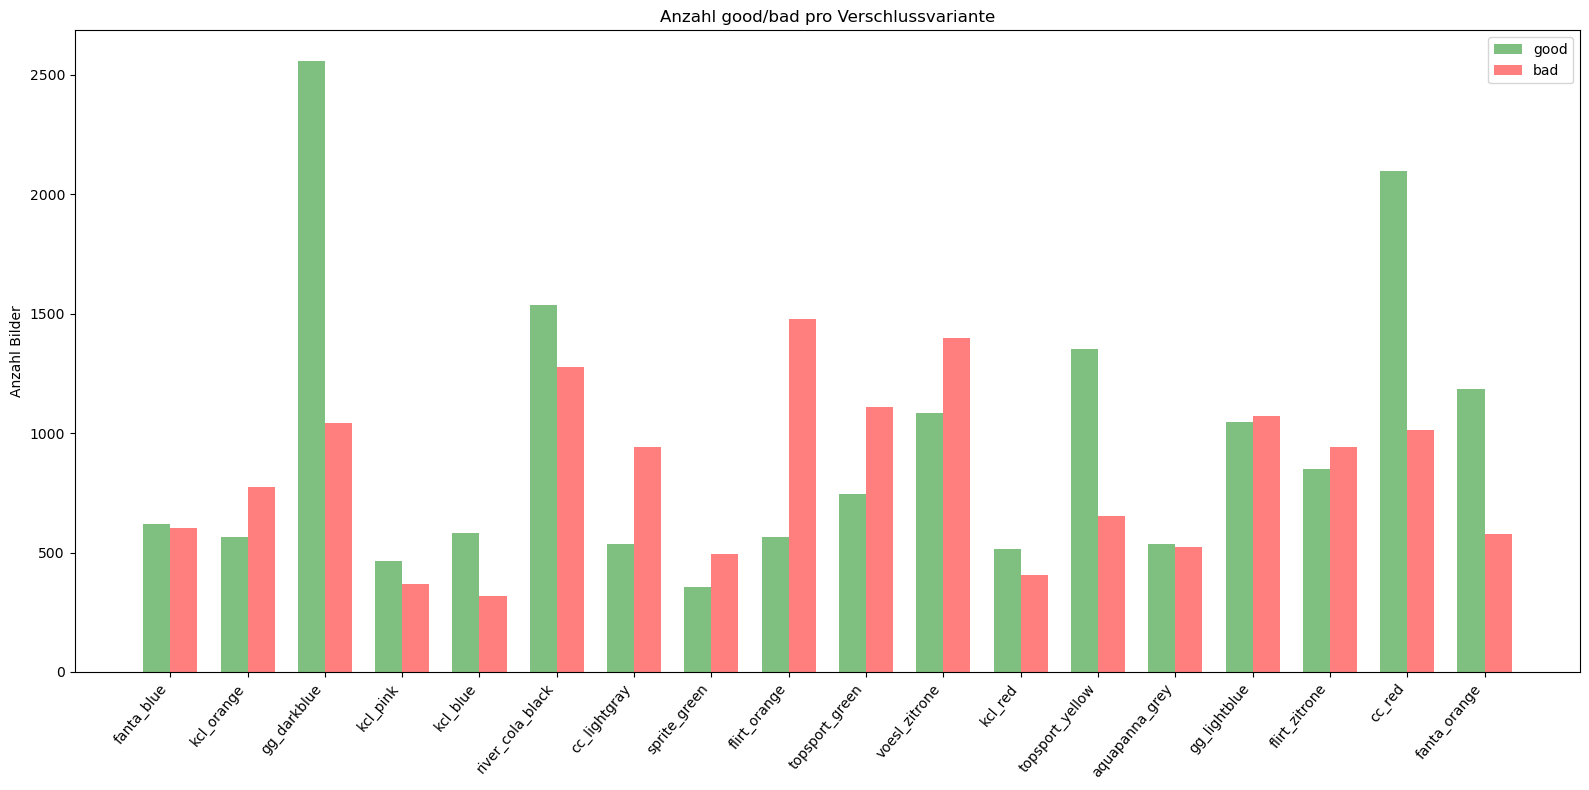

In [7]:
# Daten vorbereiten
variants = list(variant_stats.keys())
good_counts = [variant_stats[v]["good"] for v in variants]
bad_counts  = [variant_stats[v]["bad"] for v in variants]

x = np.arange(len(variants))
width = 0.35

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, good_counts, width, label="good", color="green", alpha=0.5)
plt.bar(x + width/2, bad_counts,  width, label="bad", color="red", alpha=0.5)
plt.xticks(x, variants, rotation=50, ha="right")
plt.ylabel("Anzahl Bilder")
plt.title("Anzahl good/bad pro Verschlussvariante")
plt.legend()
plt.tight_layout()
plt.show()

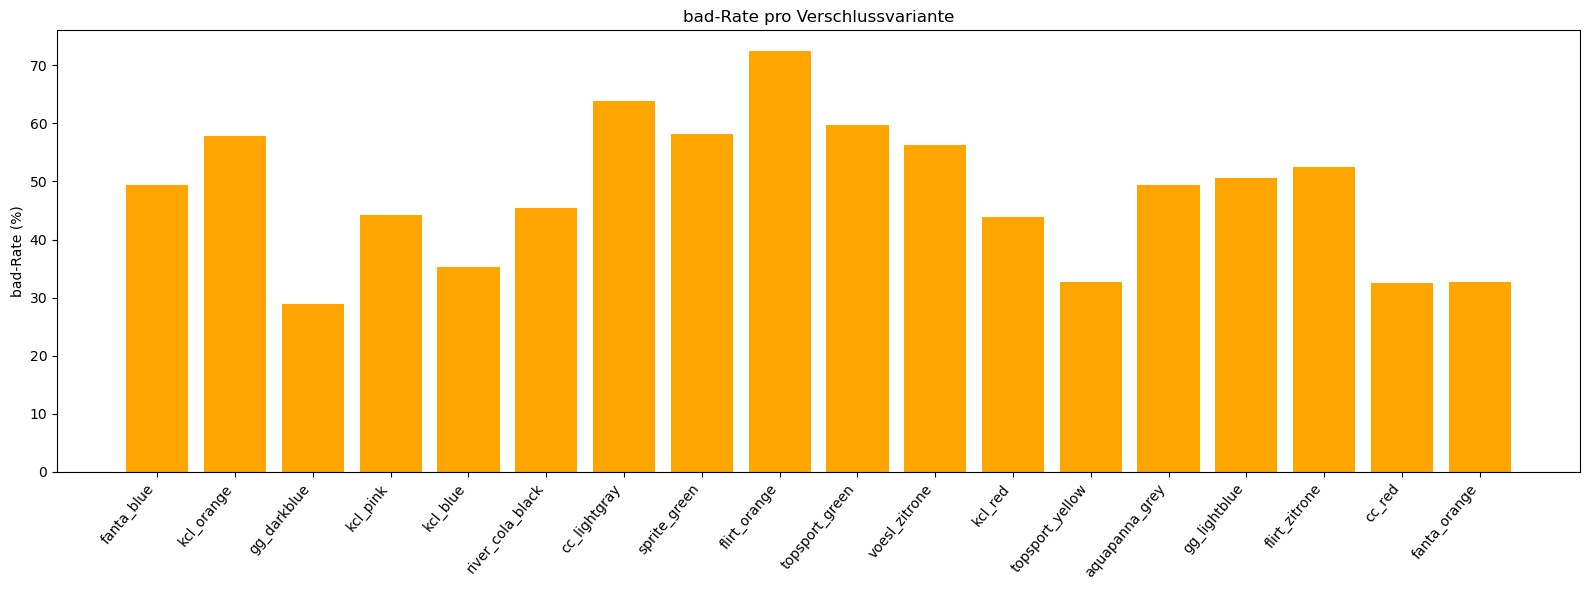

In [8]:
# Visualisierung der bad-Rate pro Verschlussvariante
variants = list(variant_summary.keys())
bad_rates = [variant_summary[v]["bad_rate"] for v in variants]

plt.figure(figsize=(16, 6))
plt.bar(variants, bad_rates, color="orange")

plt.xticks(rotation=50, ha="right")
plt.ylabel("bad-Rate (%)")
plt.title("bad-Rate pro Verschlussvariante")
plt.tight_layout()
plt.show()

Die Bilddateien wurden rekursiv eingelesen und die vollständigen Dateipfade in einer Liste (all_image_paths) gespeichert. Dies ermöglicht eine flexible Weiterverarbeitung der Daten, da die Bildpfade später direkt für das Erstellen eigener Dataset-Klassen, für den Train-/Validierungs-Split sowie für Visualisierungen und Qualitätsanalysen genutzt werden können.

Zusätzlich wurde ein erster quantitativer Überblick über den Datensatz erstellt. Insgesamt liegen 32 179 Bilder vor, davon 17 188 „good“ und 14 991 „bad“. Damit ist die Gesamtverteilung der Klassen relativ ausgewogen, auch wenn die Anzahl der good-Bilder leicht überwiegt.

Darüber hinaus wurde die Verteilung je Verschlussvariante analysiert, um Unterschiede in der Datenmenge und im Verhältnis von fehlerhaften zu fehlerfreien Beispielen sichtbar zu machen. Die Auswertung zeigt, dass die Anzahl der Bilder pro Verschlussvariante teils stark variiert: die geringste Gesamtanzahl weist kcl_pink mit 832 Bildern auf, während gg_darkblue mit 3602 Bildern die am häufigsten vertretene Variante ist. Ebenso unterscheiden sich die bad-Raten je Variante erheblich. Einige Varianten weisen eine sehr hohe Fehlerrate auf, beispielsweise flirt_orange mit 72.39 % oder cc_lightgray mit 63.78 %. Andere Varianten zeigen vergleichsweise niedrige Fehlerraten, etwa gg_darkblue mit 28.96 %, cc_red mit 32.59 % oder fanta_orange mit 32.77 %.

Diese Unterschiede sind für die spätere Modellbewertung bedeutsam, da ungleich verteilte Varianten und stark variierende bad-Raten das Lernverhalten der Modelle beeinflussen können. Varianten mit wenigen Beispielen oder hoher Fehlerrate können insbesondere zu verzerrten Ergebnissen oder abweichender Modellperformance führen.

Um die Bilder für die weitere Verarbeitung und das spätere Training der Deep-Learning-Modelle vorzubereiten, ist es zunächst notwendig zu prüfen, ob die gelieferten Aufnahmen einheitliche oder unterschiedlich große Bildformate aufweisen. Abweichende Auflösungen können sich auf das Preprocessing auswirken und müssen gegebenenfalls durch ein einheitliches Resize-Verfahren harmonisiert werden. Daher wird im nächsten Schritt die Verteilung der Bildgrößen analysiert.

In [10]:
# Liste zur Speicherung der Bildauflösungen
# Es wird jeweils ein Tupel (Breite, Höhe) abgelegt
sizes = []

# Über alle Bildpfade iterieren und Bildgröße auslesen
for img_path in all_image_paths:
    try:
        # Bild öffnen
        with Image.open(img_path) as img:
            sizes.append(img.size)   # img.size = (width, height)
    except:
        # Falls ein Bild nicht gelesen werden kann wird es übersprungen, um die Analyse nicht abzubrechen
        pass

# Anzahl der erfolgreich analysierten Bilder
print(f"Anzahl analysierter Bilder: {len(sizes)}")

# Zählen, wie oft jede Auflösung im Datensatz vorkommt
size_count = Counter(sizes)

# Ausgabe der vorhandenen Bildgrößen und ihrer Häufigkeit
print("\nVorhandene Bildgrößen (Breite × Höhe):")
for (w, h), count in size_count.items():
    print(f"{w} x {h}  -> {count} Bilder")

# Separate Listen für Breite und Höhe erzeugen,
# um statistische Kennzahlen berechnen zu können
widths  = [w for w, h in sizes]
heights = [h for w, h in sizes]

# Ausgabe der minimalen und maximalen Bildabmessungen im Datensatz
print("\nStatistik:")
print(f"Min Breite : {min(widths)}")
print(f"Max Breite : {max(widths)}")
print(f"Min Höhe   : {min(heights)}")
print(f"Max Höhe   : {max(heights)}")

Anzahl analysierter Bilder: 32179

Vorhandene Bildgrößen (Breite × Höhe):
354 x 121  -> 1221 Bilder
358 x 127  -> 1339 Bilder
366 x 109  -> 3602 Bilder
358 x 122  -> 832 Bilder
356 x 131  -> 896 Bilder
346 x 113  -> 4666 Bilder
350 x 119  -> 1477 Bilder
348 x 122  -> 850 Bilder
346 x 117  -> 2043 Bilder
366 x 118  -> 2482 Bilder
364 x 125  -> 919 Bilder
346 x 108  -> 2007 Bilder
338 x 117  -> 1060 Bilder
334 x 112  -> 2116 Bilder
344 x 113  -> 1794 Bilder
366 x 116  -> 3111 Bilder
358 x 113  -> 1764 Bilder

Statistik:
Min Breite : 334
Max Breite : 366
Min Höhe   : 108
Max Höhe   : 131


Die Analyse der Bildauflösungen zeigt, dass der Datensatz aus insgesamt 32 179 Bildern besteht, die in 17 unterschiedlichen Größen vorliegen. Die Breite der Bilder variiert dabei zwischen ca. 334 und 366 Pixeln, während die Höhe zwischen 108 und 131 Pixeln liegt. Obwohl die Auflösungen leicht voneinander abweichen, bewegen sie sich in einem relativ engen Größenbereich.

Für die weitere Modellierung bedeutet dies, dass ein einheitliches Resize-Verfahren erforderlich ist, um alle Bilder auf dieselbe Eingabegröße zu bringen. Die geringe Varianz der Originalgrößen erleichtert diesen Schritt, da dabei nur minimale Verzerrungen oder Informationsverluste zu erwarten sind.

Um einen ersten visuellen Eindruck vom Datensatz zu gewinnen, werden im Folgenden repräsentative Beispielbilder dargestellt.
Zunächst werden zufällig ausgewählte good-Bilder gezeigt. Die Auswahl ist gleichmäßig über alle Verschlussvarianten verteilt, wodurch sich ein abwechslungsreicher Überblick ergibt. Dadurch wird sichtbar, wie unterschiedlich die Deckel hinsichtlich Farbe, Beleuchtung und Oberflächenstruktur aussehen können.

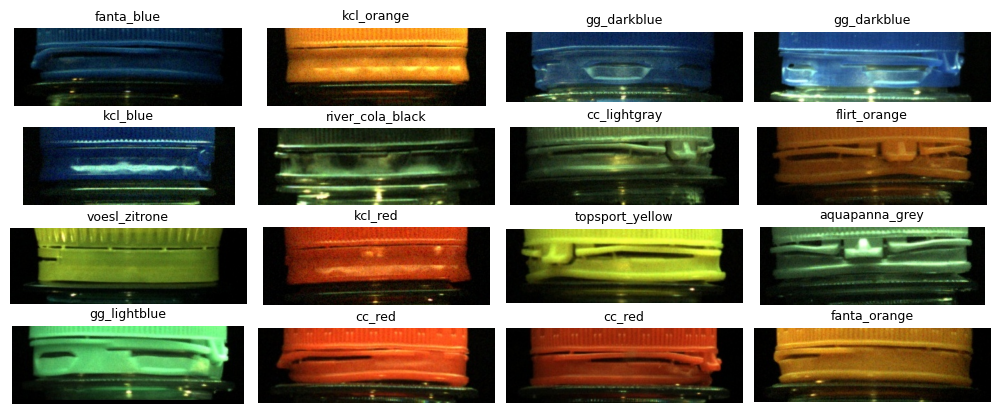

In [11]:
# Auswahl von 16 gleichmäßig über den Datensatz verteilten Good-Bildern
good_paths = [p for p in all_image_paths if "/good/" in p.lower()]

n = 16
step = len(good_paths) / n
idx = [floor(i * step) for i in range(n)]
selected_paths = [good_paths[i] for i in idx]

# 4x4 Grid zur Darstellung exemplarischer Good-Bilder
fig, axs = plt.subplots(4, 4, figsize=(10, 4))

for ax, img_path in zip(axs.flatten(), selected_paths):
    img = Image.open(img_path)
    ax.imshow(img)

    # Verschlussvariante aus dem Pfad
    variant = img_path.split("/")[-3]
    ax.set_title(variant, fontsize=9)

    ax.axis("off")

# Abstände reduzieren für ein kompaktes Layout
plt.subplots_adjust(
    left=0.01, right=0.99, top=0.95, bottom=0.01,
    wspace=0.05, hspace=0.28
)

plt.show()

Neben den fehlerfreien Beispielen ist auch ein Blick auf die bad-Bilder wichtig, da diese die relevanten Defektarten enthalten, die ein Modell später erkennen soll.
Daher folgt im nächsten Schritt eine Auswahl typischer bad-Beispiele – ebenfalls gleichmäßig über alle Verschlussvarianten verteilt.

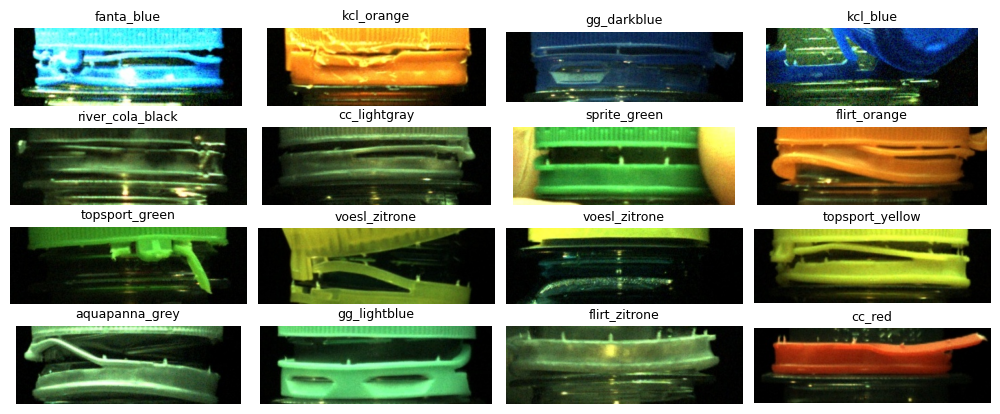

In [12]:
# 16 gleichmäßig verteilte Bad-Bilder auswählen
bad_paths = [p for p in all_image_paths if "/bad/" in p.lower()]

n = 16
step = len(bad_paths) / n
idx = [floor(i * step) for i in range(n)]
selected_paths = [bad_paths[i] for i in idx]

# 4x4 Grid zur Darstellung exemplarischer Good-Bilder
fig, axs = plt.subplots(4, 4, figsize=(10, 4))

for ax, img_path in zip(axs.flatten(), selected_paths):
    img = Image.open(img_path)
    ax.imshow(img)

    variant = img_path.split("/")[-3]
    ax.set_title(variant, fontsize=9)

    ax.axis("off")

# Abstände reduzieren für ein kompaktes Layout
plt.subplots_adjust(
    left=0.01, right=0.99, top=0.95, bottom=0.01,
    wspace=0.05, hspace=0.28
)

plt.show()

Die Bildbeispiele verdeutlichen sowohl die große Farb- und Variantenvielfalt der Verschlüsse als auch die Variabilität innerhalb der Kameraaufnahmen (z. B. Helligkeit, Kontrast, Position des Deckels).
Die good-Bilder zeigen zudem, dass selbst fehlerfreie Tethered-Caps-Verschlüsse eine deutlich komplexere Geometrie aufweisen als herkömmliche Schraubverschlüsse. Während klassische Deckel aus allen Blickrichtungen nahezu identisch aussehen und sich daher gut über reine Pixelbasismethoden prüfen ließen, besitzen Tethered Caps bewegliche Stege und asymmetrische Formen. Dadurch entsteht eine natürliche strukturelle Variabilität, die für die Inspektion eine zusätzliche Herausforderung darstellt.

Die bad-Bilder zeigen typische Defekte wie Risse, gebrochene Stege, Verbiegungen („Smile“) oder geometrische Deformationen. Diese visuelle Heterogenität bestätigt, dass für die spätere Klassifikation ein robustes Modell erforderlich ist, das sowohl unterschiedliche Verschlussvarianten als auch die variierenden Aufnahmebedingungen zuverlässig bewältigen kann.

## 3.3 Datensplits

Ziel dieses Abschnitts ist die strukturierte Aufteilung des Gesamtdatensatzes in Trainings-, Validierungs- und Testdaten.  
Der Datensatz wird dabei im Verhältnis **70 % Training**, **15 % Validation** und **15 % Test** aufgeteilt.

Um eine faire und vergleichbare Modellbewertung zu gewährleisten, wird bei allen Splits auf eine konstante Klassenverteilung geachtet. Der relative Anteil von *good*- und *bad*-Bildern bleibt somit in allen drei Teilmengen möglichst identisch.

Die Aufteilung erfolgt in zwei Schritten unter Verwendung einer stratifizierten Zufallsauswahl, um sowohl Reproduzierbarkeit als auch eine ausgewogene Klassenverteilung sicherzustellen.

In [13]:
# Labels und Indizes vorbereiten

# Indizes aller Bilder (entspricht der Reihenfolge in all_image_paths)
indices = list(range(len(all_image_paths)))

# Label-Liste: 0 = good, 1 = bad
labels = []

# Zuordnung der Labels basierend auf dem Pfad
for p in all_image_paths:
    if p in good_paths:
        labels.append(0) # good
    else:
        labels.append(1) # bad

In [14]:
# 2-stufige Aufteilung in Train / Validation / Test,
# da train_test_split jeweils nur zwei Teilmengen erzeugt

train_indices, temp_indices = train_test_split(
    indices,
    test_size=0.30,      # 70 % Training, 30 % Rest
    stratify=labels,     # ähnliche Klassenverteilung in allen Splits
    random_state=42
)

In [15]:
# Label-Liste für den temporären Split erzeugen,
# da stratify nur Labels der aktuell betrachteten Teilmenge akzeptiert
temp_labels = [labels[i] for i in temp_indices]

val_indices, test_indices = train_test_split(
    temp_indices,
    test_size=0.50,      # 50 % Validation, 50 % Test
    stratify=temp_labels,
    random_state=42
)

In [16]:
# Bildpfade für Train-, Validation- und Test-Split erzeugen
train_paths = [all_image_paths[i] for i in train_indices]
val_paths   = [all_image_paths[i] for i in val_indices]
test_paths  = [all_image_paths[i] for i in test_indices]

In [17]:
# Klassenverteilung innerhalb eines Splits zählen
def count_labels(paths):
    labels = []
    for p in paths:
        if "/good/" in p.lower():
            labels.append("good")
        else:
            labels.append("bad")
    return Counter(labels)

In [18]:
print("Gesamt:", len(all_image_paths))
print("Train :", len(train_paths), count_labels(train_paths))
print("Val   :", len(val_paths), count_labels(val_paths))
print("Test  :", len(test_paths),  count_labels(test_paths))

Gesamt: 32179
Train : 22525 Counter({'good': 12031, 'bad': 10494})
Val   : 4827 Counter({'good': 2578, 'bad': 2249})
Test  : 4827 Counter({'good': 2579, 'bad': 2248})


Die Ausgabe bestätigt, dass der Datensatz erfolgreich in Trainings-, Validierungs- und Testdaten aufgeteilt wurde.  
Die angestrebte Aufteilung von 70 % Training, 15 % Validation und 15 % Test wird eingehalten.

Zudem zeigt die Klassenverteilung, dass der relative Anteil von *good*- und *bad*-Bildern in allen drei Splits nahezu identisch ist.  
Damit ist sichergestellt, dass die nachfolgenden Trainings- und Evaluationsschritte auf vergleichbaren Daten basieren und keine systematischen Verzerrungen durch eine unausgewogene Klassenverteilung entstehen.

## 3.4 Bildvorverarbeitung

In diesem Kapitel wird die Bildvorverarbeitung beschrieben, die als Grundlage für das Training und die Evaluation der neuronalen Netze dient.  
Ziel der Vorverarbeitung ist es, die bereitgestellten Bilddaten in ein einheitliches Format zu überführen und für die nachfolgenden Modelle geeignet aufzubereiten.

Zunächst werden zwei Hilfsfunktionen definiert, um die Bildgröße konsistent anzupassen, ohne das Seitenverhältnis zu verändern. Dazu wird das Bild proportional auf eine Zielgröße skaliert und anschließend durch Padding zu einem quadratischen Format ergänzt.

In [19]:
def resize_image(image, target_size=256):
    # Skaliert ein Bild proportional, sodass die längere Seite der Zielgröße entspricht
    # Seitenverhältnis bleibt erhalten, es erfolgt keine Verzerrung

    w, h = image.size  # ursprüngliche Bildbreite und -höhe

    if w >= h:
        new_w = target_size
        new_h = int(h * target_size / w)
    else:
        new_h = target_size
        new_w = int(w * target_size / h)

    # Resize mit bilinearer Interpolation
    # Beim Skalieren fallen die neuen Pixelpositionen i. d. R. nicht exakt auf das alte Pixelraster
    # Die neuen Pixelwerte werden daher aus den vier nächstgelegenen Pixeln interpoliert
    return image.resize((new_w, new_h), Image.BILINEAR)

In [20]:
def square_pad(image):
    # Erweitert ein Bild zentriert auf ein quadratisches Format

    w, h = image.size
    max_wh = max(w, h)

    # Padding so berechnen, dass das Bild zentriert bleibt
    pad_left   = (max_wh - w) // 2
    pad_right  = max_wh - w - pad_left
    pad_top    = (max_wh - h) // 2
    pad_bottom = max_wh - h - pad_top

    padding = (pad_left, pad_top, pad_right, pad_bottom)

    # Padding mit schwarzem Hintergrund (fill=0)
    return TF.pad(image, padding, fill=0)

Die Bildvorverarbeitung wird in zwei aufeinanderfolgende Schritte unterteilt.  
Im ersten Schritt werden ausschließlich deterministische Operationen angewendet, die für alle Bilder identisch sind und unabhängig vom Trainingsprozess erfolgen.

Dieser Schritt umfasst die Größenanpassung unter Erhalt des Seitenverhältnisses, das Padding auf ein quadratisches Format sowie die anschließende Konvertierung der Bilder in Tensoren. Die so vorverarbeiteten Bilder können gespeichert und bei weiteren Durchläufen wiederverwendet werden, um Rechenzeit zu sparen.

In [21]:
# Vorverarbeitung: Resize mit Seitenverhältnis, Padding auf Quadrat, Konvertierung zu Tensor
transform_step1 = transforms.Compose([
    resize_image,
    square_pad,
    transforms.ToTensor(),
])

Im zweiten Schritt werden trainingsspezifische Operationen angewendet, die ausschließlich während des Trainings zum Einsatz kommen. Dazu zählen Datenaugmentationen sowie die anschließende Normalisierung der Bilddaten.

Die Augmentationsparameter sind explizit definiert und können zwischen verschiedenen Trainingsläufen angepasst werden, um deren Einfluss auf die Modellleistung gezielt zu untersuchen und geeignete Parameterkombinationen zu identifizieren. Für die Normalisierung werden die etablierten ImageNet-Mittelwerte und -Standardabweichungen verwendet.

Weitere Augmentationsstrategien sind grundsätzlich möglich und werden in der Praxis teilweise eingesetzt; im Rahmen dieser Arbeit beschränkt sich die Vorverarbeitung jedoch bewusst auf eine überschaubare und kontrollierbare Auswahl.

In [22]:
imagenet_mean = (0.485, 0.456, 0.406)
imagenet_std  = (0.229, 0.224, 0.225)

In [23]:
# Parameter zur Datenaugmentation
ROT_DEG = 2          # maximale Rotationsabweichung in Grad
HFLIP_P = 0.0        # Wahrscheinlichkeit für horizontales Spiegeln

BRIGHTNESS = 0       # Änderung der Bildhelligkeit
CONTRAST   = 0       # Änderung des Bildkontrasts
SATURATION = 0       # Änderung der Farbsättigung
HUE        = 0       # Verschiebung des Farbtons

In [24]:
# Datenaugmentation und Normalisierung für das Training
transform_train_step2 = transforms.Compose([
    transforms.RandomRotation(ROT_DEG),
    transforms.RandomHorizontalFlip(p=HFLIP_P),
    transforms.ColorJitter(
        brightness=BRIGHTNESS,
        contrast=CONTRAST,
        saturation=SATURATION,
        hue=HUE,
    ),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
])

# Normalisierung für Validation und Test (keine Augmentation)
transform_test_step2 = transforms.Compose([
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
])

Die beschriebene Bildvorverarbeitung bildet die Grundlage für die nachfolgenden Schritte der Datenverarbeitung.  
Im nächsten Kapitel wird gezeigt, wie die vorverarbeiteten Bilder in PyTorch-Datasets eingebunden und mithilfe von DataLoadern effizient für Training, Validierung und Test bereitgestellt werden.

## 3.5 Datasets und DataLoader

In diesem Abschnitt wird beschrieben, wie die vorverarbeiteten Bilddaten in PyTorch-Datasets eingebunden und mithilfe von DataLoadern für Training, Validierung und Test bereitgestellt werden. Ziel ist eine effiziente und reproduzierbare Datenbereitstellung, bei der deterministische Vorverarbeitungsschritte nur einmal durchgeführt und trainingsspezifische Transformationen flexibel angewendet werden können.

Hierzu wird ein eigenes Dataset implementiert, das die Bildpfade, die Zuordnung der Klassenlabels sowie die Nutzung der vorverarbeiteten Tensoren kapselt. Die anschließenden DataLoader übernehmen das Batching und die optionale Durchmischung der Daten und bilden damit die Grundlage für die nachfolgenden Trainings- und Evaluationsschritte.

In [25]:
# Pfad zu den vorverarbeiteten Bildern (deterministische Vorverarbeitung)
preprocessed_path = "/home/archive/TetheredCap/preprocessed_images"
print("Preprocessed image directory:", preprocessed_path)

Preprocessed image directory: /home/archive/TetheredCap/preprocessed_images


Für die nachfolgenden Trainings- und Evaluationsschritte wird ein eigenes PyTorch-Dataset (`PreprocessedImageDataset`) verwendet, das die Bildvorverarbeitung in zwei Stufen trennt und deterministische Schritte einmalig speichert.

transform_step1 (deterministisch) umfasst Resize, Padding auf ein quadratisches Format sowie die Konvertierung der Bilder in Tensoren. Die resultierenden Tensoren werden pro Bild als `.pt`-Dateien im Verzeichnis `preprocessed_dir` gespeichert und bei weiteren Zugriffen direkt geladen, wodurch wiederholte Berechnungen in späteren Epochen und Experimenten vermieden werden.

transform_step2 (optional) enthält trainingsspezifische Operationen wie Datenaugmentation und Normalisierung. Dieser Schritt wird erst nach dem Laden der vorverarbeiteten Tensoren angewendet und kann abhängig vom jeweiligen Datensplit (Training, Validation, Test) unterschiedlich konfiguriert werden.

Die Klassenzugehörigkeit wird aus der Ordnerstruktur abgeleitet (`good = 0`, `bad = 1`). Zusätzlich wird neben Tensor und Label auch der Originalpfad zurückgegeben, um eine gezielte Analyse und Visualisierung einzelner Bilder, beispielsweise bei Fehlklassifikationen, zu ermöglichen.

In [28]:
class PreprocessedImageDataset(Dataset):
    def __init__(self, paths, preprocessed_dir, transform_step1, transform_step2=None):
        """
        paths: Liste der Bildpfade (Train / Validation / Test)
        preprocessed_dir: Ablageort für deterministisch vorverarbeitete Bildtensoren
        transform_step1: feste Vorverarbeitung (Resize, Padding, ToTensor)
        transform_step2: optionale trainingsspezifische Transformationen
        """
        self.paths = paths
        self.preprocessed_dir = preprocessed_dir
        self.transform_step1 = transform_step1
        self.transform_step2 = transform_step2

        # Zielverzeichnis für vorverarbeitete Tensoren anlegen
        os.makedirs(self.preprocessed_dir, exist_ok=True)

    def __len__(self):
        return len(self.paths)

    def _get_label(self, path):
        # Label aus der Ordnerstruktur ableiten (good = 0, bad = 1)
        p = path.lower()
        return 0 if "/good/" in p else 1

    def _get_preprocessed_path(self, path):
        # Eindeutiger Dateiname basierend auf relativem Bildpfad
        rel_path = os.path.relpath(path)
        h = hashlib.md5(rel_path.encode("utf-8")).hexdigest()
        return os.path.join(self.preprocessed_dir, f"{h}.pt")

    def __getitem__(self, idx):
        path = self.paths[idx]
        label = self._get_label(path)

        preprocessed_file = self._get_preprocessed_path(path)

        # Vorverarbeiteten Tensor laden oder einmalig erzeugen
        if os.path.exists(preprocessed_file):
            x = torch.load(preprocessed_file, map_location="cpu")
        else:
            img = Image.open(path).convert("RGB")
            x = self.transform_step1(img)
            torch.save(x, preprocessed_file)

        # Trainingsspezifische Transformationen (falls definiert)
        if self.transform_step2 is not None:
            x = self.transform_step2(x)

        return x, label, path

In [29]:
# Datasets für Training, Validation und Test erzeugen
# Verwendet vorverarbeitete Tensoren aus preprocessed_path (deterministische Schritte werden einmalig gespeichert)
# transform_step2 wird erst beim Zugriff auf ein Sample angewendet (__getitem__)

train_dataset = PreprocessedImageDataset(
    paths=train_paths,                          # Bildpfade für Training
    preprocessed_dir=preprocessed_path,         # Ablageort für vorverarbeitete Tensoren (.pt)
    transform_step1=transform_step1,            # deterministische Vorverarbeitung (Resize, Pad, ToTensor)
    transform_step2=transform_train_step2       # Training: Augmentation + Normalisierung
)

val_dataset = PreprocessedImageDataset(
    paths=val_paths,                            # Bildpfade für Validation
    preprocessed_dir=preprocessed_path,         # gleicher Ablageort für vorverarbeitete Tensoren
    transform_step1=transform_step1,            # gleiche deterministische Vorverarbeitung
    transform_step2=transform_test_step2        # Validation: nur Normalisierung (keine Augmentation)
)

test_dataset = PreprocessedImageDataset(
    paths=test_paths,                           # Bildpfade für Test
    preprocessed_dir=preprocessed_path,         # gleicher Ablageort für vorverarbeitete Tensoren
    transform_step1=transform_step1,            # gleiche deterministische Vorverarbeitung
    transform_step2=transform_test_step2        # Test: nur Normalisierung (keine Augmentation)
)

In [30]:
# Erstellung der DataLoader für Training, Validation und Test
# Der DataLoader übernimmt das Batching sowie die optionale Durchmischung der Daten
# Laden der Bilder und Anwendung der Transformationen erfolgen innerhalb des Datasets

# DataLoader für das Training
# shuffle=True, um die Trainingsdaten in jeder Epoche neu zu mischen
# batch_size definiert die Anzahl der Bilder pro Mini-Batch
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    shuffle=True,
    num_workers=0
)

# DataLoader für die Validierung
# keine Durchmischung, da nur Evaluation
val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=0
)

# DataLoader für den Test
# keine Durchmischung, da reine Leistungsbewertung
test_loader = DataLoader(
    test_dataset,
    batch_size=32,
    shuffle=False,
    num_workers=0
)

Mit der beschriebenen Struktur für Datasets und DataLoader ist eine konsistente und effiziente Datenbasis geschaffen. Die vorverarbeiteten Bilddaten können damit flexibel in nachfolgenden Experimenten genutzt werden und bilden die Grundlage für die weiteren Modellierungs-, Trainings- und Vergleichsschritte.

# 4. Überwachte Bildklassifikation zur Inspektion von Tethered Caps

# 5. Unüberwachter Ansatz mittels Encoder-Netzwerken

# 6. Zusammenfassung und Ausblick

* Ausblick: Training auf neue Flaschen / Verschlüsse

# 7. Quellenverzeichnis

[1] KHS GmbH, „Innocheck TSI – Sicherungsringinspektion“, interne Präsentation, Dortmund, 2025.  
[2] Verbraucherzentrale, „Tethered Caps: Warum geht der Verschluss an der Flasche nicht mehr ab?“, Online-Artikel, verfügbar unter: https://www.verbraucherzentrale.de/wissen/umwelt-haushalt/nachhaltigkeit/tethered-caps-warum-geht-der-verschluss-an-der-flasche-nicht-mehr-ab-78264 [Zugriff am 07.12.2025].  
[3] KHS GmbH, „EU-Richtlinie Tethered Caps: KHS berät ganzheitlich zu Maßnahmen und Anpassungen in der Linie“, Online-Pressemitteilung, verfügbar unter: https://www.khs.com/unternehmen/aktuelles/pressemitteilungen/detail/tethered-caps [Zugriff am 07.12.2025].  
[4] Bruce, P., Bruce, A., Gedeck, P., *Praktische Statistik für Data Scientists – 50+ essenzielle Konzepte mit R und Python*, 1. Auflage, dpunkt.verlag, Heidelberg, 2021.



# 8. Eigenständigkeitserklärung

In [31]:
import nbformat

# Notebook einlesen
with open("DL_TethteredCaps.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Wortanzahl in Markdown-Zellen berechnen
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').strip().split())

print(f"Wortanzahl in Markdown-Zellen: {word_count}")

Wortanzahl in Markdown-Zellen: 3021
